In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import plotly.express as px
import chart_studio
import chart_studio.plotly as py

In [2]:
#Leemos el CSV de Properati
properati_df = pd.read_csv("properati.csv", sep = ',')
#Mostramos primeros registros y verificamos tipos de datos
display(properati_df.head(5))
print (properati_df.dtypes)
#Vemos las columnas del DF
properati_df.columns

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [3]:
# Drop 'Unnamed: 0'. No es necesaria (= a index)
properati_df.drop(labels = ['Unnamed: 0'], axis = 'columns', inplace = True)


In [4]:
#Chequeamos cantidad de nulos por columna
data_isnull = properati_df.isnull()
data_cantnull = data_isnull.sum()
data_cantnull

operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [5]:
#Revisamos la columna "operation"
properati_df['operation'].value_counts(dropna = False)
#No tiene valores nulos y en su totalidad son "sell"

sell    121220
Name: operation, dtype: int64

In [6]:
#Revisamos la columna "property_type"
properati_df['property_type'].value_counts(dropna = False)
#No tiene nulos y las categorías son correctas

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

In [7]:
#Revisamos la columna "place_name"
properati_df['place_name'].value_counts(dropna = False)
#Hay 1061 categorías de "barrios"

Córdoba                                9254
Rosario                                8504
Mar del Plata                          6534
Tigre                                  3324
Nordelta                               3315
                                       ... 
Barrio Cerrado "El Casco de Moreno"       1
La Esperanza Club de Campo                1
Gral San Martin                           1
Country La Tradición                      1
Laguna Larga                              1
Name: place_name, Length: 1061, dtype: int64

In [8]:
#Revisamos la columna "place_with_parent_names"
properati_df['place_with_parent_names'].value_counts(dropna = False)

|Argentina|Santa Fe|Rosario|                                                                       8504
|Argentina|Córdoba|Córdoba|                                                                        6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|                                             6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|                                                3315
|Argentina|Capital Federal|Belgrano|                                                               2992
                                                                                                   ... 
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Playa Serena|                                   1
|Argentina|Bs.As. G.B.A. Zona Norte|San Fernando|Islas|                                               1
|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Echeverría|Complejo de Barrios Privados La Magdalena|       1
|Argentina|Córdoba|Villa Amancay|                               

In [9]:
#Revisamos la columna "country_name".
properati_df['country_name'].value_counts(dropna = False)
#Todos los registros corresponden a Argentina. No tiene nulos.

Argentina    121220
Name: country_name, dtype: int64

In [10]:
#Revisamos la columna "state_name".
properati_df['state_name'].value_counts(dropna = False)
#Corresponde a las provincias. Buenos Aires está desagregada en mayor nivel.

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [11]:
#Revisamos la columna "geonames_id".
properati_df['geonames_id'].value_counts(dropna = False)
#Parece ser un ID por barrio

NaN          18717
3838574.0     8504
3860259.0     6606
3430863.0     6534
3430234.0     3279
             ...  
3863596.0        1
3838859.0        1
3863890.0        1
3864851.0        1
3860197.0        1
Name: geonames_id, Length: 647, dtype: int64

In [12]:
#Revisamos la columna "currency".
properati_df['currency'].value_counts(dropna = False)
#Posiblemente podamos descartar los valores de PEN y UYU. Gran cantidad de NaN.

USD    87587
NaN    20411
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [13]:
#Revisamos la columna "floor".
properati_df['floor'].value_counts(dropna = False)
#Vemos valores que pueden ser incorrectos, por ejemplo N° de piso 302 o 207.

NaN      113321
1.0        2080
2.0        1542
3.0         914
4.0         658
          ...  
124.0         1
691.0         1
205.0         1
302.0         1
207.0         1
Name: floor, Length: 183, dtype: int64

In [14]:
#edificio de mayor cantidad de pisos en Argentina (Alvear Tower - 54 pisos). Máscara que incluye solo los que superan este nivel de piso.
mask_floor = properati_df['floor'] > 54
display (properati_df.loc[mask_floor, :].head(5))
data_floor_type = properati_df.loc[mask_floor, :]
#Vemos que todos los registros con número de piso mayor a 54 corresponden a "apartment". Correspondería que tengan número de piso pero el que tienen es incorrecto.
data_floor_type['property_type'].value_counts

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
5759,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.56633,-58.479707",-34.566330,-58.479707,...,65.0,NaN,2692.307692,408.0,2.0,NaN,http://www.properati.com.ar/15ro1_venta_depart...,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,2 AMB BALCÓN CON PARRILLA - EDIFICIO CON AMENI...,https://thumbs4.properati.com/2/pKvgfBNKpAZctY...
5960,sell,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.433301,-58.586118",-34.433301,-58.586118,...,40.0,NaN,2305.000000,111.0,2.0,NaN,http://www.properati.com.ar/15sdt_venta_depart...,Corredor Responsable: Mauro Marvisi - CMCPSI 5...,NUEVO RIVERSIDE PRE-LANZAMIENTO,https://thumbs4.properati.com/9/kRTRZoj-C9PEWN...
5961,sell,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.433301,-58.586118",-34.433301,-58.586118,...,62.0,NaN,2111.290323,1606.0,3.0,NaN,http://www.properati.com.ar/15sdw_venta_depart...,Corredor Responsable: Mauro Marvisi - CMCPSI 5...,NUEVO RIVERSIDE PRE-LANZAMIENTO,https://thumbs4.properati.com/9/wvbfUDFH1R2dDc...
5962,sell,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.433301,-58.586118",-34.433301,-58.586118,...,62.0,NaN,1973.677419,906.0,3.0,NaN,http://www.properati.com.ar/15sdy_venta_depart...,Corredor Responsable: Mauro Marvisi - CMCPSI 5...,NUEVO RIVERSIDE PRE-LANZAMIENTO,https://thumbs4.properati.com/9/wvbfUDFH1R2dDc...
5963,sell,apartment,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.433301,-58.586118",-34.433301,-58.586118,...,62.0,NaN,2304.838710,1304.0,3.0,NaN,http://www.properati.com.ar/15sdz_venta_depart...,Corredor Responsable: Mauro Marvisi - CMCPSI 5...,NUEVO RIVERSIDE PRE-LANZAMIENTO,https://thumbs4.properati.com/9/wvbfUDFH1R2dDc...


<bound method IndexOpsMixin.value_counts of 5759      apartment
5960      apartment
5961      apartment
5962      apartment
5963      apartment
            ...    
63302     apartment
63884     apartment
110239    apartment
111363    apartment
119276    apartment
Name: property_type, Length: 183, dtype: object>

In [15]:
#Pasamos todos los valores de "floor" a NaN?????

In [16]:
#Máscara para tipo de propiedad 'apartment'
mask_type_apartment = properati_df['property_type'] == 'apartment'
data_type_apartment = properati_df.loc[mask_type_apartment, :]
data_type_apartment.isnull().sum()
#Valores como expensas y piso debieran estar completos para este tipo de propiedad.

operation                         0
property_type                     0
place_name                        1
place_with_parent_names           0
country_name                      0
state_name                        0
geonames_id                    8683
lat-lon                       29428
lat                           29428
lon                           29428
price                         11449
currency                      11449
price_aprox_local_currency    11449
price_aprox_usd               11449
surface_total_in_m2           19980
surface_covered_in_m2         11330
price_usd_per_m2              28178
price_per_m2                  18871
floor                         64544
rooms                         39797
expenses                      59861
properati_url                     0
description                       2
title                             0
image_thumbnail                2125
dtype: int64

In [17]:
#promedio de expensas por 
data_type_apartment.pivot_table(index = 'property_type', columns = 'state_name', aggfunc = {'expenses' : 'mean'})

expenses                           \
state_name    Bs.As. G.B.A. Zona Norte Bs.As. G.B.A. Zona Oeste   
property_type                                                     
apartment                  3021.644444              2818.095041   

                                                                   \
state_name    Bs.As. G.B.A. Zona Sur Buenos Aires Costa Atlántica   
property_type                                                       
apartment                1503.664348                  2042.121065   

                                                                         \
state_name    Buenos Aires Interior Capital Federal   Chaco  Corrientes   
property_type                                                             
apartment                891.923077     6634.878631  2100.0  594.290323   

                                                                               \
state_name         Córdoba  Entre Ríos Formosa    La Pampa   Mendoza Misiones   
property_type                                                                   
apartment      3004.114144  606.863636  1120.0  983.333333  108040.0   2500.0   

                                                                       \
state_name         Neuquén Río Negro   Salta    San Luis     Santa Fe   
property_type                                                           
apartment      1015.925926    1096.8  4100.0  783.333333  1429.937282   

                            
state_name         Tucumán  
property_type               
apartment      2023.413793

In [18]:
#Mendoza tiene valor extremadamente alto. Analizamos.
mask_mendoza = properati_df['state_name'] == 'Mendoza'
data_mendoza = properati_df.loc[mask_mendoza, :]
data_mendoza['expenses'].describe()

count    6.900000e+01
mean     4.721117e+04
std      1.946698e+05
min      1.000000e+00
25%      1.500000e+03
50%      5.000000e+03
75%      7.000000e+03
max      1.200000e+06
Name: expenses, dtype: float64

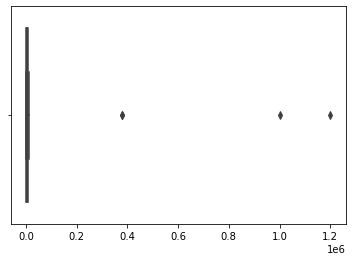

In [19]:
sns.boxplot(x=data_mendoza['expenses'].values);

In [20]:
#Buscamos outliers
data_mendoza_expenses = data_mendoza['expenses']
q1 = data_mendoza_expenses.quantile(0.25)
print(q1)
q2 = data_mendoza_expenses.quantile(0.50)
print(q2)
q3 = data_mendoza_expenses.quantile(0.75)
print(q3)

#Rango intercuartil

iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)

print(low_threshold)

1500.0
5000.0
7000.0
15250.0
-6750.0


In [21]:
#Máscaras para filtrar outliers
mask_up = data_mendoza_expenses > up_threshold
mask_down = data_mendoza_expenses < low_threshold
outlier_mask = np.logical_or(mask_up, mask_down)
not_outliers = np.logical_not(outlier_mask)

outliers_expenses_mendoza = data_mendoza_expenses[outlier_mask]
outliers_expenses_mendoza

88456     380000.0
88474     380000.0
92775    1000000.0
96364    1200000.0
Name: expenses, dtype: float64

In [22]:
#Filtramos sin outliers y vemos los parámetros
data_mendoza_expenses_sin_outliers = data_mendoza_expenses[not_outliers]
data_mendoza_expenses_sin_outliers.describe()

count       65.000000
mean      4578.015385
std       3017.988478
min          1.000000
25%       1200.000000
50%       5000.000000
75%       7000.000000
max      10500.000000
Name: expenses, dtype: float64

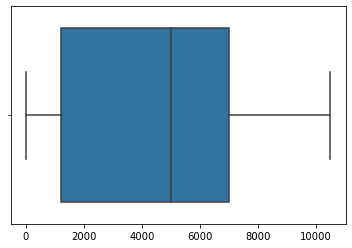

In [23]:
sns.boxplot(x=data_mendoza_expenses_sin_outliers.values);

In [24]:
#Guardamos en una variable la media de las expensas en Mendoza sin outliers
expenses_mendoza_mean_sin_outliers = data_mendoza_expenses_sin_outliers.mean().round(2)
expenses_mendoza_mean_sin_outliers


AttributeError: 'float' object has no attribute 'round'

In [25]:
len(data_mendoza)

681

In [26]:
data_mendoza = properati_df.loc[mask_mendoza, :]
data_mendoza_expenses
data_mendoza_expenses_filled = data_mendoza_expenses.fillna(expenses_mendoza_mean_sin_outliers)
data_mendoza_expenses_filled

NameError: name 'expenses_mendoza_mean_sin_outliers' is not defined

In [32]:
#Agregamos columna nueva para los valores de expensas limpios de Mendoza.
properati_df['expensas_clean'] = data_mendoza_expenses_filled


NameError: name 'data_mendoza_expenses_filled' is not defined

In [45]:
#Revisamos la columna "rooms".
properati_df['rooms'].value_counts(dropna = False)
#Vemos valores que pueden ser incorrectos, por ejemplo 32 o 31 habitaciones (puede ser un local comercial)

NaN     73830
3.0     12567
2.0     12433
4.0      7937
1.0      7377
5.0      3782
6.0      1403
7.0       770
8.0       409
10.0      226
9.0       184
11.0       72
12.0       65
13.0       33
14.0       27
15.0       26
17.0       16
20.0       11
16.0       11
22.0        8
18.0        6
21.0        5
25.0        4
19.0        4
30.0        4
32.0        3
23.0        2
24.0        1
29.0        1
27.0        1
31.0        1
28.0        1
Name: rooms, dtype: int64

In [46]:
#Máscara para más de 20 "rooms"
mask_room = properati_df['rooms'] > 20
properati_df.loc[mask_room,:].head(5)
#Validar si podemos sacar de "Description" o "Title" si se trata de un apto hotel o similar.

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
877,sell,apartment,Monserrat,|Argentina|Capital Federal|Monserrat|,Argentina,Capital Federal,3430570.0,"-34.609988,-58.374932",-34.609988,-58.374932,...,472.0,NaN,635.593220,1.0,22.0,NaN,http://www.properati.com.ar/15gap_venta_depart...,Corredor Responsable: Mario Gabriel Gerez - CU...,Venta Hotel Familiar Calle Peru al 100,https://thumbs4.properati.com/1/6N7K5-4_54qOYo...
14714,sell,apartment,Moreno,|Argentina|Bs.As. G.B.A. Zona Oeste|Moreno|Mor...,Argentina,Bs.As. G.B.A. Zona Oeste,3430550.0,NaN,NaN,NaN,...,51.0,NaN,1372.549020,NaN,25.0,NaN,http://www.properati.com.ar/16syb_venta_depart...,Corredor Responsable: Hernan Perrone - CMCPDJM...,Departamento en Moreno Centro,https://thumbs4.properati.com/5/p-41IGC6eWT1rF...
27354,sell,house,Punilla,|Argentina|Córdoba|Punilla|,Argentina,Córdoba,3839996.0,"-31.102948,-64.480335",-31.102948,-64.480335,...,650.0,NaN,169.230769,NaN,25.0,NaN,http://www.properati.com.ar/17td8_venta_casa_p...,Corredor Responsable: Edgardo Tamarit - CPCPI ...,SE VENDE HOSTERIA A REFACCIONAR LA FALDA CORDOBA,https://thumbs4.properati.com/3/CU5Ssv8Tr1-x7e...
28078,sell,house,Punilla,|Argentina|Córdoba|Punilla|,Argentina,Córdoba,3839996.0,"-31.131799,-64.465456",-31.131799,-64.465456,...,850.0,NaN,682.352941,NaN,25.0,NaN,http://www.properati.com.ar/17van_venta_casa_p...,Corredor Responsable: DANIELA E. CASTRO - CPCP...,SE VENDE CASONA APTA HOTEL EN VALLE HERMOSO,https://thumbs4.properati.com/9/oRrJzyxquWhwKD...
33818,sell,house,Santa Rosa de Calamuchita,|Argentina|Córdoba|Santa Rosa de Calamuchita|,Argentina,Córdoba,3835943.0,"-32.062637,-64.542629",-32.062637,-64.542629,...,650.0,NaN,1338.461538,NaN,30.0,NaN,http://www.properati.com.ar/18aoy_venta_casa_s...,Corredor Responsable: Matiaz Ruiz Moreno - CPC...,APART HOTEL COSTANERA SANTA ROSA DE CALAMUCHITA,https://thumbs4.properati.com/0/x1ISRlGGN5EH4n...


In [47]:
#properati_df[['currency','price','price_aprox_local_currency','price_aprox_usd']].sample(10)
#Validamos que los registros que tienen algún NaN en esas columnas lo tienen en todas. Si tienen completa alguna de ellas, tienen completa todas.
import numpy as np

mask1 = properati_df['currency'].isnull()
mask2 = properati_df['price'].isnull()
mask3 = properati_df['price_aprox_local_currency'].isnull()
mask4 = properati_df['price_aprox_usd'].isnull()

a = np.logical_and(mask1, mask2)
b = np.logical_and(a,mask3)
c = np.logical_and(b,mask4)
c.value_counts()

False    100810
True      20410
dtype: int64

In [48]:
properati_df[['place_name','currency','price','price_aprox_local_currency','price_aprox_usd']].sample(10)



,place_name,currency,price,price_aprox_local_currency,price_aprox_usd
741,Boedo,USD,289000.0,5099260.50,289000.00
36452,Posadas,ARS,2500000.0,2473921.05,140209.19
38746,Palermo,USD,167000.0,2946631.50,167000.00
5601,Mar del Plata,USD,250000.0,4411125.00,250000.00
52338,Pinamar,USD,179700.0,3170716.65,179700.00
120096,Rosario,NaN,NaN,NaN,NaN
98355,Moreno,USD,112472.0,1984512.20,112472.00
12791,Mar del Plata,USD,780000.0,13762710.00,780000.00
11180,Córdoba,USD,620000.0,10939590.00,620000.00
5767,Nordelta,ARS,3357585.0,3322560.10,188305.71


In [49]:
#Validamos lo dicho anteriormente.
display(properati_df.groupby('state_name').apply(lambda x: x['price'].isnull().sum()/len(x)*100))
properati_df.groupby('state_name').apply(lambda x: x['currency'].isnull().sum()/len(x)*100)
#Provicias del interior como San Juan, La Pampa, Tucumán, Entre Ríos, tienen alto % de valores nulos.

state_name
Bs.As. G.B.A. Zona Norte         5.876369
Bs.As. G.B.A. Zona Oeste        21.336623
Bs.As. G.B.A. Zona Sur          13.381594
Buenos Aires Costa Atlántica     9.464321
Buenos Aires Interior           20.820602
Capital Federal                 10.205471
Catamarca                        3.703704
Chaco                           36.842105
Chubut                          36.679537
Corrientes                      19.382504
Córdoba                         25.113928
Entre Ríos                      64.769648
Formosa                         55.384615
Jujuy                           61.538462
La Pampa                        77.070064
La Rioja                        50.000000
Mendoza                         30.102790
Misiones                        25.000000
Neuquén                         55.798090
Río Negro                       55.321782
Salta                           63.309353
San Juan                        90.000000
San Luis                        17.460317
Santa Cruz             

state_name
Bs.As. G.B.A. Zona Norte         5.876369
Bs.As. G.B.A. Zona Oeste        21.336623
Bs.As. G.B.A. Zona Sur          13.381594
Buenos Aires Costa Atlántica     9.464321
Buenos Aires Interior           20.820602
Capital Federal                 10.205471
Catamarca                        3.703704
Chaco                           36.842105
Chubut                          36.679537
Corrientes                      19.382504
Córdoba                         25.122214
Entre Ríos                      64.769648
Formosa                         55.384615
Jujuy                           61.538462
La Pampa                        77.070064
La Rioja                        50.000000
Mendoza                         30.102790
Misiones                        25.000000
Neuquén                         55.798090
Río Negro                       55.321782
Salta                           63.309353
San Juan                        90.000000
San Luis                        17.460317
Santa Cruz             

In [50]:
#Valores promedios de USD por m2
properati_df.groupby('property_type').apply(lambda x: x['price_usd_per_m2'].mean()).sort_values(ascending = False)

property_type
apartment    2676.472717
store        2183.966993
PH           1462.976944
house        1181.237458
dtype: float64

In [51]:
#Describe de parámetros del precio aprox en USD de los apartment
properati_df[properati_df['property_type'] == 'apartment']['price_aprox_usd'].describe()

count    5.961600e+04
mean     1.874069e+05
std      3.162183e+05
min      4.666620e+03
25%      8.000000e+04
50%      1.190000e+05
75%      1.900000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [52]:
#Precio promedio de usd por metro cuadrado de propiedades por tipo agrupados por State_name
properati_df.groupby(['state_name','property_type']).apply(lambda x: x['price_usd_per_m2'].mean())

state_name                property_type
Bs.As. G.B.A. Zona Norte  PH               1451.712566
                          apartment        2539.871735
                          house            1339.764409
                          store            1862.009755
Bs.As. G.B.A. Zona Oeste  PH               1224.018825
                                              ...     
Tierra Del Fuego          store            1100.747107
Tucumán                   PH               1329.819072
                          apartment        1495.412049
                          house            1047.004923
                          store             600.299163
Length: 98, dtype: float64

In [53]:
properati_df.pivot_table(index='state_name', columns='property_type', aggfunc={'price_aprox_usd':'mean'})


price_aprox_usd                               \
property_type                             PH     apartment          house   
state_name                                                                  
Bs.As. G.B.A. Zona Norte       136045.021789  2.011129e+05  426326.612906   
Bs.As. G.B.A. Zona Oeste       110474.792761  1.144657e+05  218529.773389   
Bs.As. G.B.A. Zona Sur         110617.264765  1.241593e+05  250338.176161   
Buenos Aires Costa Atlántica    89488.609946  1.173806e+05  213872.162242   
Buenos Aires Interior          102302.851429  1.489603e+05  209487.652505   
Capital Federal                189433.372960  2.453469e+05  501267.519862   
Catamarca                                NaN  1.203333e+06  315876.027857   
Chaco                                    NaN  1.243432e+05  160621.639167   
Chubut                                   NaN  1.625027e+05  356365.166696   
Corrientes                     124571.428571  1.576384e+05  247610.302397   
Córdoba                        351597.541515  1.397666e+05  292671.095523   
Entre Ríos                      61692.040000  8.948829e+04  156780.676622   
Formosa                                  NaN  6.346337e+04            NaN   
Jujuy                                    NaN  6.589832e+04  360505.973750   
La Pampa                                 NaN  8.125056e+04  112175.412000   
La Rioja                                 NaN           NaN   60954.385000   
Mendoza                        247500.000000  1.318896e+05  403157.342974   
Misiones                        57018.400000  9.106706e+04  132785.315481   
Neuquén                        119619.671375  1.345912e+05  387763.816598   
Río Negro                       94759.515000  2.002270e+05  404785.444207   
Salta                                    NaN  1.973477e+05  448188.111064   
San Juan                                 NaN  3.476711e+05  251480.515000   
San Luis                        85846.020000  1.544213e+05  298312.877178   
Santa Cruz                               NaN  8.973388e+04  185633.891765   
Santa Fe                        81173.060789  1.278950e+05  187405.277949   
Santiago Del Estero                      NaN  3.028518e+04  230000.000000   
Tierra Del Fuego                         NaN  1.187592e+05  190499.686875   
Tucumán                         77675.885000  1.333862e+05  218445.141803   

                                             
property_type                         store  
state_name                                   
Bs.As. G.B.A. Zona Norte      550360.608254  
Bs.As. G.B.A. Zona Oeste      404753.043005  
Bs.As. G.B.A. Zona Sur        392462.840389  
Buenos Aires Costa Atlántica  261157.146111  
Buenos Aires Interior         245353.893061  
Capital Federal               514980.211471  
Catamarca                               NaN  
Chaco                         485000.000000  
Chubut                        430793.103448  
Corrientes                    233076.923077  
Córdoba                       289198.881353  
Entre Ríos                    623384.032000  
Formosa                                 NaN  
Jujuy                                   NaN  
La Pampa                      308460.220000  
La Rioja                                NaN  
Mendoza                       342741.038571  
Misiones                      196434.696667  
Neuquén                       822500.000000  
Río Negro                     327356.323684  
Salta                         179467.760000  
San Juan                                NaN  
San Luis                      517713.991111  
Santa Cruz                    100950.610000  
Santa Fe                      251077.863506  
Santiago Del Estero                     NaN  
Tierra Del Fuego              371514.630000  
Tucumán                       168659.926000

In [54]:
properati_df.groupby(['state_name','property_type']).apply(lambda x: x['price_aprox_usd'].mean())

state_name                property_type
Bs.As. G.B.A. Zona Norte  PH               136045.021789
                          apartment        201112.905033
                          house            426326.612906
                          store            550360.608254
Bs.As. G.B.A. Zona Oeste  PH               110474.792761
                                               ...      
Tierra Del Fuego          store            371514.630000
Tucumán                   PH                77675.885000
                          apartment        133386.182071
                          house            218445.141803
                          store            168659.926000
Length: 98, dtype: float64

In [55]:
properati_df.groupby(['state_name','place_name','property_type']).apply(lambda x: x['price_aprox_usd'].mean())

state_name                place_name               property_type
Bs.As. G.B.A. Zona Norte   Country Maschwitz Club  house            311666.666667
                           los alamos              apartment         81600.000000
                          Acacias Blancas          house            249529.411765
                          Acassuso                 PH               238750.000000
                                                   apartment        289469.767442
                                                                        ...      
Tucumán                   Tucumán                  store            205640.143333
                          Villa Belgrano           apartment                  NaN
                          Yerba Buena              apartment         91987.110000
                                                   house            318982.235263
                                                   store            106205.287500
Length: 2180, dtype: float64

In [56]:
#Analizamos 'price_usd_per_m2' ya que la usaremos para sacar conclusiones.
properati_df['price_usd_per_m2'].describe()

count     68617.000000
mean       2160.086916
std        2759.288621
min           0.600000
25%        1218.181818
50%        1800.000000
75%        2486.411765
max      206333.333333
Name: price_usd_per_m2, dtype: float64

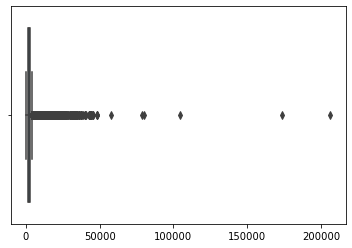

In [57]:
sns.boxplot(x=properati_df['price_usd_per_m2'].values);

In [58]:
#Vemos outliers en 'price_usd_per_m2'
data_price_usd_per_m2 = properati_df['price_usd_per_m2']
q1m2 = data_price_usd_per_m2.quantile(0.25)
print(q1m2)
q2m2 = data_price_usd_per_m2.quantile(0.50)
print(q2m2)
q3m2 = data_price_usd_per_m2.quantile(0.75)
print(q3m2)

#Rango intercuartil

iqrm2 = (q3m2 - q1m2) * 1.5

up_threshold_m2 = q3m2 + iqrm2
low_threshold_m2 = q1m2 - iqrm2

print(up_threshold_m2)

print(low_threshold_m2)

1218.1818181818182
1800.0
2486.4117647058824
4388.756684491978
-684.1631016042782


In [59]:
#Máscaras para filtrar outliers
mask_up_m2 = data_price_usd_per_m2 > up_threshold_m2
mask_down_m2 = data_price_usd_per_m2 < low_threshold_m2
outlier_mask_m2 = np.logical_or(mask_up_m2, mask_down_m2)
not_outliers_m2 = np.logical_not(outlier_mask_m2)

outliers_price_m2 = data_price_usd_per_m2[outlier_mask_m2]
outliers_price_m2

57         8333.333333
244        5045.871560
252        6035.353535
381        6481.481481
400        6481.481481
              ...     
120062     4411.764706
120124    11750.000000
121093     6888.888889
121100     6888.888889
121215     7699.115044
Name: price_usd_per_m2, Length: 2868, dtype: float64

In [60]:
#Parámetros sin outliers
data_price_usd_per_m2_filtered = data_price_usd_per_m2[not_outliers_m2]
data_price_usd_per_m2_filtered.describe()

count    65749.000000
mean      1797.352380
std        885.749022
min          0.600000
25%       1185.537588
50%       1755.813953
75%       2379.310345
max       4387.800000
Name: price_usd_per_m2, dtype: float64

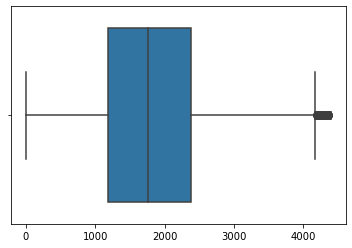

In [61]:
#Box plot sin outliers
sns.boxplot(x=data_price_usd_per_m2_filtered.values);

In [62]:
#Guardamos en una variable la media del precio por m2 sin outliers
mean_usd_per_m2_sin_outliers = data_price_usd_per_m2_filtered.mean().round(2)
mean_usd_per_m2_sin_outliers


AttributeError: 'float' object has no attribute 'round'

In [63]:
#Agrupamos por grandes centros urbanos
dic_categorias_urbanas = {'Capital Federal':'Capital Federal', 'Bs.As. G.B.A. Zona Sur':'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica':'Buenos Aires Costa Atlántica','Bs.As. G.B.A. Zona Norte':'Bs.As. G.B.A. Zona Norte', 'Santa Fe':'Santa Fe', 'Córdoba':'Córdoba',
       'Bs.As. G.B.A. Zona Oeste':'Bs.As. G.B.A. Zona Oeste','Buenos Aires Interior':'Buenos Aires Interior',
       'Mendoza':'Mendoza','Santa Fe':'Santa Fe', 'Córdoba':'Córdoba','Entre Ríos':'Resto del pais','Misiones':'Resto del pais', 'Salta':'Resto del pais','Neuquén':'Resto del pais','Río Negro':'Resto del pais','San Luis':'Resto del pais', 'Corrientes': 'Resto del pais','Chubut': 'Resto del pais', 'Tucumán':'Resto del pais','La Pampa':'Resto del pais', 'Chaco':'Resto del pais','San Juan':'Resto del pais', 'Santa Cruz':'Resto del pais','Tierra Del Fuego':'Resto del pais','Catamarca':'Resto del pais','Santiago Del Estero':'Resto del pais', 'Jujuy':'Resto del pais','La Rioja':'Resto del pais','Formosa':'Resto del pais'}
properati_df_replacement = properati_df.replace(dic_categorias_urbanas)
properati_df_replacement['state_name'].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Resto del pais',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Buenos Aires Interior', 'Mendoza'],
      dtype=object)

In [64]:
#Creamos nueva columna en el DF original donde incluimos los agrupamientos por centro urbano
properati_df['centro_urbano'] = properati_df_replacement['state_name']
properati_df.head(10)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,centro_urbano
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,Capital Federal
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,Bs.As. G.B.A. Zona Sur
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,Capital Federal
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,Capital Federal
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,Buenos Aires Costa Atlántica
5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,-58.519828,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...,Resto del pais
6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,...,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...,Bs.As. G.B.A. Zona Norte
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,Capital Federal
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,Capital Federal
9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,-60.725919,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1

In [65]:
#Agrupamos por centro urbano y tipo de propiedad para saber precio de m2 promedio.
precio_m2_centro_urbano = properati_df.groupby(['centro_urbano','property_type']).apply(lambda x: x['price_usd_per_m2'].mean())
display(precio_m2_centro_urbano)


centro_urbano                 property_type
Bs.As. G.B.A. Zona Norte      PH               1451.712566
                              apartment        2539.871735
                              house            1339.764409
                              store            1862.009755
Bs.As. G.B.A. Zona Oeste      PH               1224.018825
                              apartment        1720.754481
                              house            1081.629587
                              store            1556.947316
Bs.As. G.B.A. Zona Sur        PH               1114.012013
                              apartment        1889.978782
                              house            1164.503788
                              store            1541.024184
Buenos Aires Costa Atlántica  PH               1156.454370
                              apartment        1958.838430
                              house             749.149782
                              store            1401.045662
Buenos Aires

In [66]:
#Buscamos outliers en Bs As Norte (precio por m2) agrupado por tipo de propiedad.
mask_bsas_norte = properati_df['centro_urbano'] == 'Bs.As. G.B.A. Zona Norte'
data_bsas_norte = properati_df.loc[mask_bsas_norte,:]
data_bsas_norte
mask_type_ph = properati_df['property_type'] == 'PH'
mask_type_house = properati_df['property_type'] == 'house'
mask_type_store = properati_df['property_type'] == 'store'
data_bsas_norte_apartment = data_bsas_norte.loc[mask_type_apartment,:]
data_bsas_norte_ph = data_bsas_norte.loc[mask_type_ph,:]
data_bsas_norte_house = data_bsas_norte.loc[mask_type_house,:]
data_bsas_norte_store = data_bsas_norte.loc[mask_type_store,:]

#Empezamos con apartment

data_price_m2_apartment_bsas_norte = data_bsas_norte_apartment['price_usd_per_m2']
q1m2banorte = data_price_m2_apartment_bsas_norte.quantile(0.25)
print(q1m2banorte)
q2m2banorte = data_price_m2_apartment_bsas_norte.quantile(0.50)
print(q2m2banorte)
q3m2banorte = data_price_m2_apartment_bsas_norte.quantile(0.75)
print(q3m2banorte)

#Rango intercuartil

iqrm2banorte = (q3m2banorte - q1m2banorte) * 1.5

up_threshold_m2banorte = q3m2banorte + iqrm2banorte
low_threshold_m2banorte = q1m2banorte - iqrm2banorte

print(up_threshold_m2banorte)

print(low_threshold_m2banorte)

1803.7028985507247
2300.0
2922.0779220779223
4599.640457368719
126.14036325992834


In [67]:
data_price_m2_apartment_bsas_norte.describe()

count     7343.000000
mean      2539.871735
std       2387.647600
min         29.906933
25%       1803.702899
50%       2300.000000
75%       2922.077922
max      48296.222222
Name: price_usd_per_m2, dtype: float64

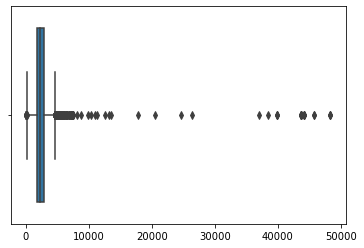

In [68]:
#Box plot Bs As Norte Apartment (Precio m2)
sns.boxplot(x=data_price_m2_apartment_bsas_norte.values);

In [69]:
#Máscaras para filtrar outliers
mask_up_m2banorte = data_price_m2_apartment_bsas_norte > up_threshold_m2banorte
mask_down_m2banorte = data_price_m2_apartment_bsas_norte < low_threshold_m2banorte
outlier_mask_m2banorte = np.logical_or(mask_up_m2banorte, mask_down_m2banorte)
not_outliers_m2banorte = np.logical_not(outlier_mask_m2banorte)

outliers_price_m2banorte = data_price_m2_apartment_bsas_norte[outlier_mask_m2banorte]
outliers_price_m2banorte

571       5782.312925
610       8130.000000
628       5681.818182
1138      5612.244898
4378      4647.058824
             ...     
116547    5188.679245
116631    5068.493151
116632    4743.589744
116654    4615.384615
116658    4974.093264
Name: price_usd_per_m2, Length: 169, dtype: float64

In [70]:
#Parámetros sin outliers
data_price_m2_apartment_bsas_norte_filtered = data_price_m2_apartment_bsas_norte[not_outliers_m2banorte]
data_price_m2_apartment_bsas_norte_filtered.describe()

count    7174.000000
mean     2358.056318
std       784.568623
min       148.500000
25%      1797.385669
50%      2276.923077
75%      2887.323113
max      4596.774194
Name: price_usd_per_m2, dtype: float64

In [71]:
mean_price_m2_banorte_apartment = data_price_m2_apartment_bsas_norte_filtered.mean().round(2)
mean_price_m2_banorte_apartment

AttributeError: 'float' object has no attribute 'round'

In [ ]:
#Box plot Bs As Norte Apartment (Precio m2) sin outliers
sns.boxplot(x=data_price_m2_apartment_bsas_norte_filtered.values);

In [ ]:
#Completamos los NaN de precio por m2 de Bs As zona norte tipo apartment
data_price_m2_apartment_bsas_norte_filled = data_price_m2_apartment_bsas_norte.fillna(mean_price_m2_banorte_apartment)a

In [ ]:
properati_df.head(3)

In [ ]:
properati_df.currency.value_counts(dropna = False)

In [ ]:
properati_df.columns

In [72]:
### ANALISIS DE VALORES NaN DE USD POR M2

# Generamos una nueva columna paa calcular el precio por m2 utilizando superficie cubierta:
properati_df['precio_m2_usd_cubierta'] = properati_df['price_aprox_usd']/properati_df['surface_covered_in_m2']
properati_df['precio_m2_usd_cubierta'].value_counts(dropna = False)
# Tiene 33560 valores NaN

NaN            33560
2000.000000      890
1500.000000      656
1000.000000      650
2500.000000      594
               ...  
3554.054054        1
3586.274510        1
2693.478261        1
753.362761         1
3353.336757        1
Name: precio_m2_usd_cubierta, Length: 26735, dtype: int64

In [73]:
# Generamos una mascara para comparar los nuevos valores "precio_m2_usd_cubierta" y "price_usd_per_m2":
# Máscara con valores nulos de la variable precio_m2_usd_cubierta:
mask_m2_cubierta_nan = properati_df.precio_m2_usd_cubierta.isnull()
mask_m2_cubierta_nan.sum()

33560

In [74]:
# Al utilizar la mascara, verificamos que la columna "price_usd_per_m2" tiene algunos valores que quizás podriamos imputarlos en nuestra nueva variable "precio_m2_usd_cubierta":
precios_y_m2 = properati_df[['currency','price','price_aprox_local_currency','price_aprox_usd', 'price_usd_per_m2', 'price_per_m2', 'precio_m2_usd_cubierta', 'surface_covered_in_m2']]
verificar = precios_y_m2[mask_m2_cubierta_nan]
print(verificar.shape)
verificar.tail(10)

(33560, 8)


,currency,price,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,price_per_m2,precio_m2_usd_cubierta,surface_covered_in_m2
121205,ARS,1507000.0,1491279.61,84518.1,1690.362000,NaN,NaN,NaN
121206,ARS,1507000.0,1491279.61,84518.1,1690.362000,NaN,NaN,NaN
121207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0
121208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0
121209,USD,410000.0,7234245.00,410000.0,2611.464968,NaN,NaN,NaN
121210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0
121211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0
121212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420.0
121213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0
121214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0


In [75]:
mask = verificar['price_usd_per_m2'].notnull()
verificar[mask][['price_usd_per_m2', 'precio_m2_usd_cubierta']]
# Hay 5265 valores en "price_usd_per_m2" que no estan en "precio_m2_usd_cubierta"

,price_usd_per_m2,precio_m2_usd_cubierta
10,46.235139,NaN
15,1524.390244,NaN
66,1918.421053,NaN
142,236.842105,NaN
168,719.021487,NaN
...,...,...
121203,1684.753600,NaN
121204,1684.753600,NaN
121205,1690.362000,NaN
121206,1690.362000,NaN


In [76]:
# Rellenamos los NaN de "precio_m2_usd_cubierta" con los valores de "price_usd_per_m2" y generamos nueva columna:
usd_m2_fillna = properati_df.precio_m2_usd_cubierta.fillna(properati_df.price_usd_per_m2)
properati_df['precio_m2_usd_cubierta_nuevo'] = usd_m2_fillna
properati_df.precio_m2_usd_cubierta_nuevo.value_counts(dropna = False)
# Obtuvimos una nueva columna con 28295 NaN

NaN             28295
2000.000000       956
1500.000000       699
1000.000000       698
2500.000000       637
                ...  
5582.524272         1
2635.932000         1
1690.922750         1
24755.533333        1
1378.542703         1
Name: precio_m2_usd_cubierta_nuevo, Length: 28678, dtype: int64

In [77]:
# Vamos a corroborar si es posible verificar el origen de los valores de las columnas de precio, para confirmar si estamos imputando valores faltantes de forma correcta:
# Restamos las columnas de precio de la nueva columna:
comparacion1 = (properati_df.price_per_m2 - properati_df.precio_m2_usd_cubierta).round(2)
print(comparacion1.value_counts())

comparacion2 = (properati_df.price_usd_per_m2 - properati_df.precio_m2_usd_cubierta).round(2)
print(comparacion2.value_counts())

print(comparacion1.dropna() is properati_df.precio_m2_usd_cubierta.dropna())
print(comparacion2.dropna() is properati_df.precio_m2_usd_cubierta.dropna())
# Las columnas no son iguales, concluimos que no es correcto imputar valores de la columna "price_usd_per_m2" para completar valores faltantes de nuestra nueva columna.

0.00        77230
28317.49       77
23597.91       73
18878.33       58
9439.16        35
            ...  
2327.46         1
10058.12        1
37557.93        1
58134.84        1
38206.22        1
Length: 6204, dtype: int64
 0.00      20493
-166.67       59
-400.00       55
-200.00       53
-333.33       51
           ...  
-117.91        1
-778.07        1
-468.36        1
-204.86        1
-407.85        1
Length: 26934, dtype: int64
False
False


In [78]:
# Visualización para verificar las diferencias de valores existentes entre las columnas 'price_per_m2' y 'precio_m2_usd_cubierta':
properati_df[['price_per_m2', 'precio_m2_usd_cubierta']].sample(10)

,price_per_m2,precio_m2_usd_cubierta
47629,3840.579710,3840.579710
81463,1233.333333,1233.333333
66253,NaN,NaN
42838,1942.857143,1942.857143
21766,2192.982456,2192.982456
86068,NaN,NaN
26399,1333.333333,1333.333333
3985,NaN,NaN
84884,NaN,NaN
94938,1512.345679,1512.345679


In [79]:
# Generamos una nueva columna de precio por m2 pero utilizando la variable de superficie total:
properati_df['precio_m2_usd_total'] = properati_df['price_aprox_usd']/properati_df['surface_total_in_m2']
properati_df['precio_m2_usd_total'].value_counts(dropna = False)
# Tiene 52354 valores NaN

NaN            52354
2000.000000      574
2500.000000      447
1000.000000      397
1500.000000      391
               ...  
2552.750000        1
2313.204366        1
2216.279710        1
1966.292135        1
1152.173913        1
Name: precio_m2_usd_total, Length: 25576, dtype: int64

In [80]:
# Verifico los valores que contiene la columnas: 
properati_df[['precio_m2_usd_total']].sort_values(by = 'precio_m2_usd_total', ascending = False)

,precio_m2_usd_total
50355,inf
32479,inf
46161,inf
59973,inf
59974,inf
...,...
121210,NaN
121211,NaN
121212,NaN
121213,NaN


In [85]:
# Y verificamos que tiene 249 valores infinitos:
mask_inf = properati_df.precio_m2_usd_total == np.inf
properati_df[['price_aprox_usd', 'precio_m2_usd_total', 'surface_total_in_m2']][mask_inf]

,price_aprox_usd,precio_m2_usd_total,surface_total_in_m2
205,180000.00,inf,0.0
206,350000.00,inf,0.0
561,42623.59,inf,0.0
562,35893.55,inf,0.0
563,59000.00,inf,0.0
...,...,...,...
114306,75000.00,inf,0.0
114307,67000.00,inf,0.0
116328,150000.00,inf,0.0
118839,55000.00,inf,0.0


In [86]:
# Reemplazamos los valores infinitos por NaN:
para_reemplazar = properati_df.precio_m2_usd_total.replace([np.inf, -np.inf], np.nan)
properati_df['precio_m2_usd_total_nuevo'] = para_reemplazar
print(properati_df['precio_m2_usd_total_nuevo'].sort_values(ascending = False).head(3))

# La columna nueva no contiene valores infinitos:
properati_df['precio_m2_usd_total_nuevo'].notnull().sum()

26637    206333.333333
26037    173826.066667
26193    104486.114286
Name: precio_m2_usd_total_nuevo, dtype: float64


68617

In [87]:
# Realizamos mismo procedimiento anterior para verificar si la nueva variable es igual a alguna variable existente:
comparacion4 = (properati_df['precio_m2_usd_total_nuevo'] - properati_df.price_per_m2).round(2)
print(comparacion4.value_counts())

comparacion5 = (properati_df['precio_m2_usd_total_nuevo'] - properati_df.price_usd_per_m2).round(2)
print(comparacion5.value_counts())

print(properati_df['precio_m2_usd_total_nuevo'].dropna() is properati_df.price_per_m2.dropna())
print(properati_df['precio_m2_usd_total_nuevo'].dropna() is properati_df.price_usd_per_m2.dropna())
print(properati_df.price_usd_per_m2.dropna().shape)
print(properati_df['precio_m2_usd_total_nuevo'].dropna().shape)
# La columna 'price_usd_per_m2' realiza el mismo calculo que 'precio_m2_usd_total_nuevo'.
# No es correcto considerar los valores de la columna 'price_usd_per_m2' para imputar valores faltantes de la columna 'precio_m2_usd_cubierta', porque contiene valores de superficie total.
# La columna "precio_m2_usd_cubierta_nuevo" puede ser desconsiderada.
# La columna "precio_m2_usd_total_nuevo" también puede ser desconsiderada porque es igual a "price_usd_per_m2".

 0.00        18400
-166.67         59
-400.00         55
-200.00         53
-333.33         51
             ...  
-603.48          1
-713.63          1
 398.60          1
-11731.00        1
-1459.69         1
Length: 29567, dtype: int64
0.0    68617
dtype: int64
False
False
(68617,)
(68617,)


In [88]:
# Visualización para verificar valores:
properati_df[['surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'precio_m2_usd_total_nuevo']].sample(10)

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,precio_m2_usd_total_nuevo
111850,46.0,35.0,NaN,NaN
30032,NaN,104.0,NaN,NaN
62518,NaN,NaN,NaN,NaN
21224,1600.0,360.0,562.500000,562.500000
103527,NaN,30.0,NaN,NaN
47077,103.0,94.0,2883.495146,2883.495146
26901,145.0,100.0,1310.344828,1310.344828
62058,720.0,214.0,500.000000,500.000000
24372,37.0,27.0,2783.783784,2783.783784
32202,192.0,137.0,1250.000000,1250.000000


In [89]:
# Verificamos una vez mas los valores nulos de las columnas:
properati_df.isnull().sum()

operation                            0
property_type                        0
place_name                          23
place_with_parent_names              0
country_name                         0
state_name                           0
geonames_id                      18717
lat-lon                          51550
lat                              51550
lon                              51550
price                            20410
currency                         20411
price_aprox_local_currency       20410
price_aprox_usd                  20410
surface_total_in_m2              39328
surface_covered_in_m2            19907
price_usd_per_m2                 52603
price_per_m2                     33562
floor                           113321
rooms                            73830
expenses                        106958
properati_url                        0
description                          2
title                                0
image_thumbnail                   3112
centro_urbano            

In [90]:
import seaborn as sns
def count_plotter(data, label, labelsize=12):    
    sns.set(rc={"figure.figsize": (10, 7), 
                "xtick.labelsize": labelsize})
    sns.set_style("white")    
    data_count = sns.countplot(data)
    data_count.set_title('Histograma de ' + label + '\n', fontsize=16)
    
def distribution_plotter(data, label, bins=None):    
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("ticks")    
    dist = sns.distplot(data, bins= bins, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribución de ' + label + '\n', fontsize=16)

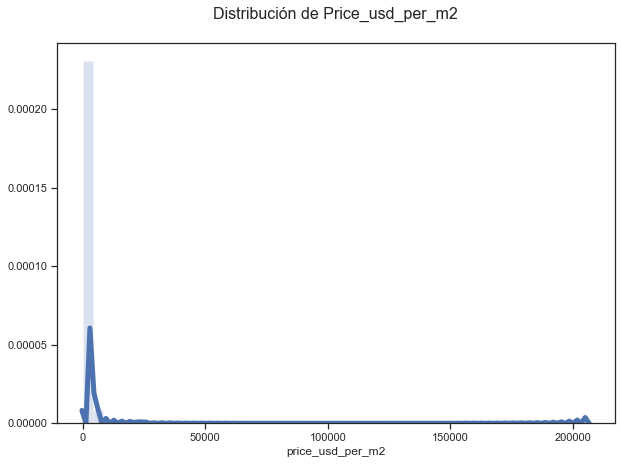

In [91]:
# Realizamos una distribución de los valores de "price_usd_per_m2":
distribution_plotter(properati_df.price_usd_per_m2, "Price_usd_per_m2")

In [92]:
# Filtramos para ver los valores mas altos:
properati_df[['price_aprox_usd', 'price_usd_per_m2', 'surface_total_in_m2']].sort_values(by = 'price_usd_per_m2', ascending = False).head(5)

,price_aprox_usd,price_usd_per_m2,surface_total_in_m2
26637,6809000.0,206333.333333,33.0
26037,5214782.0,173826.066667,30.0
26193,3657014.0,104486.114286,35.0
114131,12000000.0,80000.000000,150.0
25853,2356000.0,78533.333333,30.0


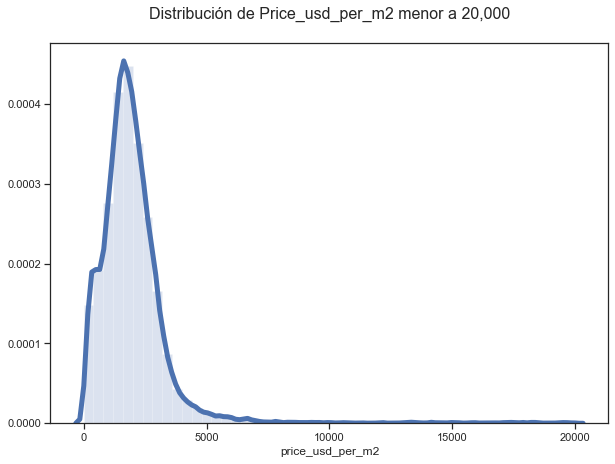

In [93]:
# Acotamos el rango para la visualización. Es necesario eliminar outliers.
mask_price_usd_per_filtro = properati_df.price_usd_per_m2 < 20000
price_usd_per_filtro = properati_df.loc[mask_price_usd_per_filtro, :]
distribution_plotter(price_usd_per_filtro.price_usd_per_m2, "Price_usd_per_m2 menor a 20,000")

In [103]:
### De aca en adelante unos histogramas por si los quieren usar con alguna otra variable

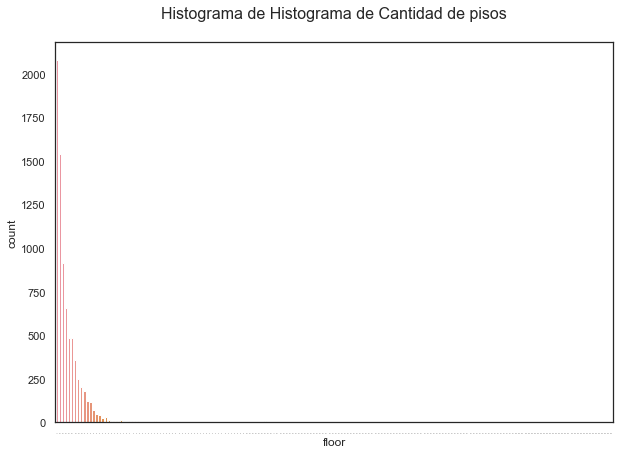

In [94]:
count_plotter(properati_df.floor, "Histograma de Cantidad de pisos", 0)

In [101]:
mask_pisos = properati_df.floor < 100
properati_df_floor_filtro = properati_df.floor.loc[mask_pisos]
properati_df_floor_filtro

83        5.0
85        1.0
89        1.0
93        2.0
94        2.0
         ... 
119937    6.0
119938    3.0
119939    3.0
119940    5.0
119942    6.0
Name: floor, Length: 7731, dtype: float64

In [95]:
properati_df.floor.sort_values(ascending =  False)

39394     3150.0
63248     2509.0
60483     2177.0
63257     2103.0
28537     1609.0
           ...  
121215       NaN
121216       NaN
121217       NaN
121218       NaN
121219       NaN
Name: floor, Length: 121220, dtype: float64

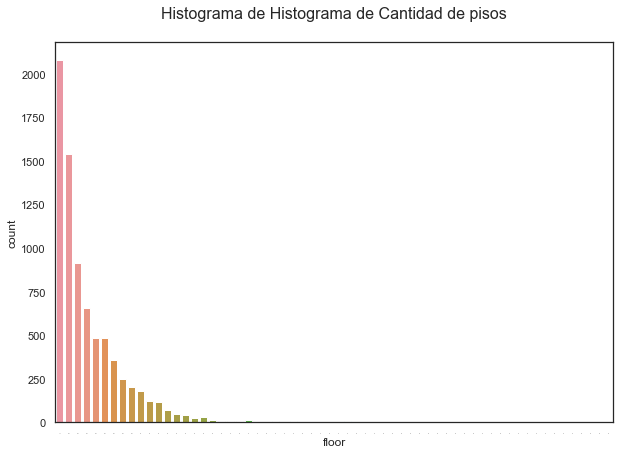

In [102]:
count_plotter(properati_df_floor_filtro, "Histograma de Cantidad de pisos", 0)